# The import of important functions
The following code changes the directory and imports all the functions we will be using today. It also defines all the variables we need

In [2]:
#Imports the functions, will change directory when I learn how
import montycarlo_h_overlap
import matplotlib.pyplot as plt
import numpy as np

#Setting my constants for when I need them
Seed = 42
R = 2
L = 20
BohrRad = 1

## The next step is to run both integrations
The steps we will take are n^x where x = integers 2-8

In [ ]:
#My laptop isn't strong enough to run the python function at N=10^8 I'm going to need a bigger boat.
N_values = [10**2,10**3,10**4,10**5,10**6,10**7,10**8]
#Monty Carlo Results
MC_Results = []
MC_Results_STD = []
#Better Monty Carlo Results
BMC_Results = []
BMC_Results_STD = []

#Runs the integrations at each of the N_values and notes the results
for n_value in N_values:
    Avg, STD = montycarlo_h_overlap.Overlap(R,L,Seed,n_value)
    B_Avg, B_STD = montycarlo_h_overlap.Better_Overlap(R,L,Seed,n_value)
    MC_Results.append(Avg)
    MC_Results_STD.append(STD)
    BMC_Results.append(B_Avg)
    BMC_Results_STD.append(B_STD)

# At last was the graph
With our values charted it's time to create a graph of the results to see how fast the importance sampled integration levels out compared to standard monty carlo

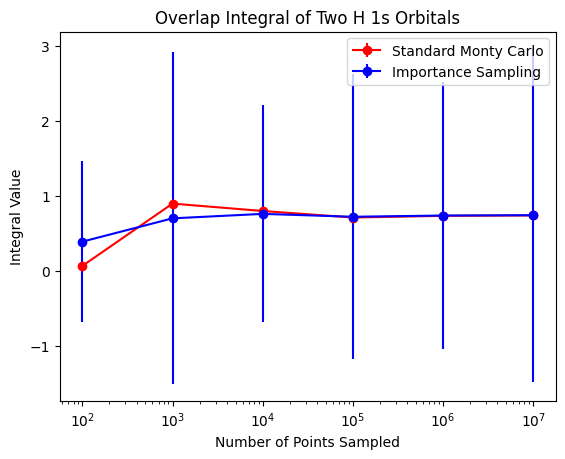

In [ ]:
plt.errorbar(N_values, MC_Results, yerr=MC_Results_STD, fmt='o-', color= 'red', label= 'Standard Monty Carlo')
plt.errorbar(N_values, BMC_Results, yerr=BMC_Results_STD, fmt='o-', color= 'blue', label= 'Importance Sampling')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Overlap Integral of Two H 1s Orbitals')
plt.legend()
plt.show()

## A Variable R
Now that we know at R = 2 the function levels out around 6000 we can adjust the R values and see what happens. 
I will be running these at an N = 10^6 so that I don't need to run everything on my more powerful home PC

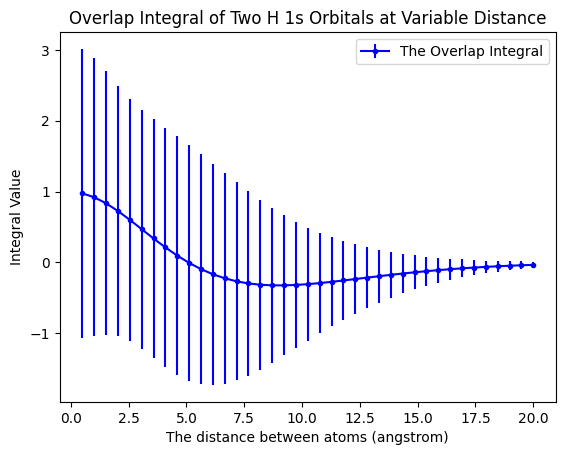

In [14]:
#The highest N value my laptop can safely run (It can sometimes run 10^7 but it's a coin toss)
N = 10**6
#A linespace of values 0.5 to 20 that are all 0.5 apart
R = np.linspace(0.5,20, 39)

#Better Monty Carlo Results
VarR_Results = []
VarR_Results_STD = []

#Runs the integrations at each of the R_values and notes the results
for R_value in R:
    Avg, STD = montycarlo_h_overlap.Better_Overlap(R_value,L,Seed,N)
    VarR_Results.append(Avg)
    VarR_Results_STD.append(STD)

plt.errorbar(R, VarR_Results, yerr=VarR_Results_STD, fmt='.-', color= 'blue', label= 'The Overlap Integral')
plt.xlabel('The distance between atoms (angstrom)')
plt.ylabel('Integral Value')
plt.title('Overlap Integral of Two H 1s Orbitals at Variable Distance')
plt.legend()
plt.show()

# The Graphs
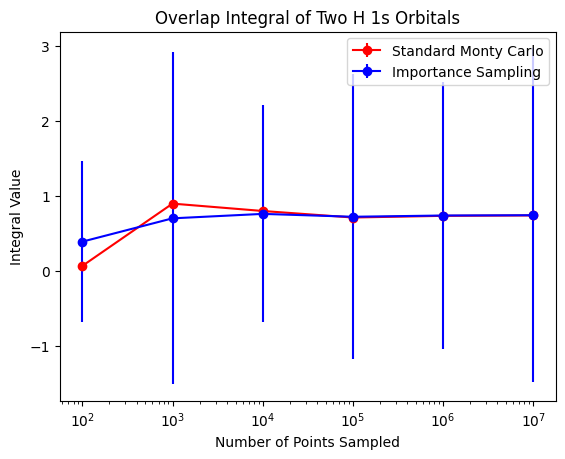
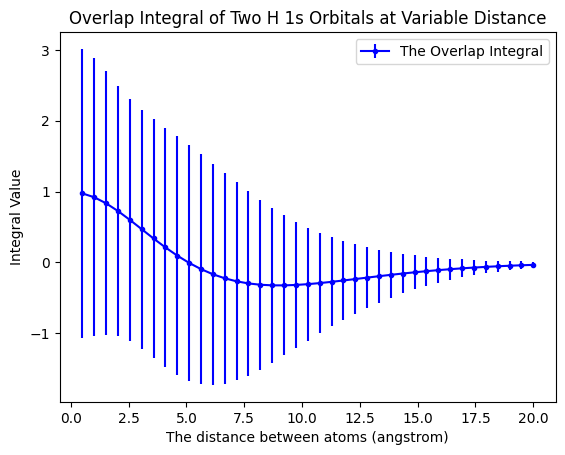

## What are the Differences with Importance Sampling

Importance sampling causes the value to reach it's plateu at in a lower number of steps than without importance sampling. With importance sampling the integration plateus at 10^4 instead of 10^6. One interesting thing is that the importance sampling had a higher error. I think the reson for this is because the standard monty carlo had a large number of zeros from the end of the integration, which means that there are alot of values that are the same. This results in a lower standard deviation, wheras the importance sampling has a much larger amount of non zero values, which increases standard deviation.

## What's the deal with increasing distances

At far enough distances the overlap between orbitals is 0. This makes since because no interaction would happen if the orbitals were too far apart. The weirdness happens when the orbitals are about 8 angstrom apart. This means that at this distance the destructive wave overlap overpowers the constructive wave overlap. My beilef for why this ocurs is at a closer distance the hydrogen atoms are able to force themselves into phase with one another, but at larger distances, they are just very likely to be out of phase, which results in a negitive sign and antibonding effect.